In [1]:
import pandas as pd
import numpy as np
import re

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, minmax_scale

In [11]:
data = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
test_id = test['PassengerId']

## Analyze the Data

可以看到cabin的na很多，ticket的意义不大，这两个feature直接丢掉。

In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
data.drop(['Ticket', 'Cabin'], axis=1, inplace=True)

In [15]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


name 里面有个title和家族名值得提取，可能会有有用的信息。

In [16]:
data['Titles'] = [re.search(r'\b([A-Za-z]+)\.', name)[0] for name in data['Name']]
data['Family'] = [re.search(r'\b([A-Za-z]+)\,', name)[0] for name in data['Name']]

In [17]:
#data.drop(['Name'], axis=1, inplace=True)
data.drop(['Family', 'Name'], axis=1, inplace=True)

In [18]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles
count,891.000000,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,3,17
top,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Mr.
freq,NaN,NaN,NaN,577,NaN,NaN,NaN,NaN,644,517
mean,446.000000,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN


我们的特征已经处理好了，里面还有些缺失值，先不管
编码一下字符特征

In [19]:
from sklearn.preprocessing import LabelEncoder, minmax_scale

le = LabelEncoder()
for str_feature in ['Titles', 'Sex', 'Embarked']:
    data[str_feature] = le.fit_transform(data[str_feature])

In [20]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles
0,1,0,3,1,22.0,1,0,7.2500,2,12
1,2,1,1,0,38.0,1,0,71.2833,0,13
2,3,1,3,0,26.0,0,0,7.9250,2,9
3,4,1,1,0,35.0,1,0,53.1000,2,13
4,5,0,3,1,35.0,0,0,8.0500,2,12


In [21]:
def data_preprocessing(data):
    data.drop(['Ticket', 'Cabin'], axis=1, inplace=True)
    data['Titles'] = [re.search(r'\b([A-Za-z]+)\.', name)[0] for name in data['Name']]
    data.drop(['Name'], axis=1, inplace=True)
    
    for str_feature in ['Titles', 'Sex', 'Embarked']:
        data[str_feature] = le.fit_transform(data[str_feature])
        
    data.drop(['PassengerId', 'Titles'], axis=1, inplace=True)
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Age'] = minmax_scale(data['Age'])
    data['Fare'] = minmax_scale(data['Fare'])
    
    return data

# Train test split

In [54]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
test_id = test['PassengerId']

test = data_preprocessing(test)
data = data_preprocessing(data)


data_train, data_test = train_test_split(data, test_size=0.2, shuffle=True, random_state=9)

x = data.drop(['Survived'], axis=1)
y = data['Survived']

x_train, x_test = x.loc[data_train.index], x.loc[data_test.index]
y_train, y_test = y.loc[data_train.index], y.loc[data_test.index]

# Model Training

## LGBM

In [30]:
from lightgbm import LGBMClassifier
params = cv.best_params_
lgbm_clf = LGBMClassifier(**params, random_state=3333)
lgbm_clf.fit(x_train, y_train)

LGBMClassifier(colsample_bytree=0.7, learning_rate=0.05, min_child_samples=30,
               random_state=3333, reg_alpha=0, reg_lambda=0.3, subsample=0.7)

In [55]:
from sklearn.metrics import accuracy_score, roc_auc_score

y_pred = lgbm_clf.predict_proba(x_test)[:,1]>0.5
accuracy_score(y_train, lgbm_clf.predict_proba(x_train)[:,1]>0.5), accuracy_score(y_test, y_pred)

(0.8848314606741573, 0.8268156424581006)

In [34]:
roc_auc_score(y_train, lgbm_clf.predict(x_train)), roc_auc_score(y_test, y_pred)

(0.8673871962337963, 0.7716711956521739)

In [26]:
## grid search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.03,0.05,0.07],
    'min_child_samples': [30,50,70],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.6, 0.7,0.8],
    'reg_alpha': [0, 0,3,0,7],
    'reg_lambda': [0, 0.3,0.7],
}

# 创建GridSearchCV对象
cv = GridSearchCV(
    estimator=LGBMClassifier(),
    param_grid=param_grid,
    scoring='roc_auc',  # 选择适当的评估指标
    cv=3,  # 选择适当的交叉验证折数
    n_jobs=-1,
    verbose=1,
)

# 在训练集上拟合GridSearchCV对象
cv.fit(x_train, y_train)

Fitting 3 folds for each of 810 candidates, totalling 2430 fits


GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'min_child_samples': [30, 50, 70],
                         'reg_alpha': [0, 0, 3, 0, 7],
                         'reg_lambda': [0, 0.3, 0.7], 'subsample': [0.7, 0.9]},
             scoring='roc_auc', verbose=1)

In [29]:
cv.best_params_, cv.best_score_

({'colsample_bytree': 0.7,
  'learning_rate': 0.05,
  'min_child_samples': 30,
  'reg_alpha': 0,
  'reg_lambda': 0.3,
  'subsample': 0.7},
 0.8783333654260086)

## NN

In [558]:
import tensorflow as tf
import keras


seed = 42
keras.utils.set_random_seed(seed)
keras.backend.backend(), keras.__version__

('tensorflow', '2.10.0')

In [711]:
input_dim = x.shape[1]

nn_clf = keras.Sequential(
    [
        keras.layers.Input(shape=(input_dim,)),
        keras.layers.Dense(12, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(6, activation='relu'),
        #keras.layers.Dropout(0.2),
        #keras.layers.Dense(3, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid'),
    ]
)

nn_clf.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_232 (Dense)           (None, 12)                96        
                                                                 
 dropout_110 (Dropout)       (None, 12)                0         
                                                                 
 dense_233 (Dense)           (None, 6)                 78        
                                                                 
 dense_234 (Dense)           (None, 1)                 7         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [712]:
keras.utils.plot_model(nn_clf, show_layer_activations=True, dpi=100, rankdir="LR")

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [713]:
optimzer = keras.optimizers.Adam(learning_rate=0.002)

nn_clf.compile(
    optimizer = optimzer,
    loss = 'binary_crossentropy',
    metrics = ['accuracy'],
)

In [714]:
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=20,verbose=1, restore_best_weights=True),
]

history = nn_clf.fit(x=x_train, y=y_train, epochs=500, verbose=2, 
                     validation_split=0.15,
                     shuffle=True,
                     callbacks=my_callbacks)

Epoch 1/500


19/19 - 1s - loss: 0.8175 - accuracy: 0.3967 - val_loss: 0.7523 - val_accuracy: 0.3645 - 621ms/epoch - 33ms/step
Epoch 2/500
19/19 - 0s - loss: 0.6794 - accuracy: 0.5537 - val_loss: 0.6468 - val_accuracy: 0.6262 - 48ms/epoch - 3ms/step
Epoch 3/500
19/19 - 0s - loss: 0.6214 - accuracy: 0.6430 - val_loss: 0.6159 - val_accuracy: 0.6168 - 46ms/epoch - 2ms/step
Epoch 4/500
19/19 - 0s - loss: 0.5989 - accuracy: 0.6711 - val_loss: 0.5968 - val_accuracy: 0.6355 - 48ms/epoch - 3ms/step
Epoch 5/500
19/19 - 0s - loss: 0.5953 - accuracy: 0.6545 - val_loss: 0.5798 - val_accuracy: 0.6822 - 41ms/epoch - 2ms/step
Epoch 6/500
19/19 - 0s - loss: 0.5707 - accuracy: 0.6959 - val_loss: 0.5625 - val_accuracy: 0.6822 - 46ms/epoch - 2ms/step
Epoch 7/500
19/19 - 0s - loss: 0.5693 - accuracy: 0.7058 - val_loss: 0.5462 - val_accuracy: 0.6916 - 44ms/epoch - 2ms/step
Epoch 8/500
19/19 - 0s - loss: 0.5592 - accuracy: 0.7124 - val_loss: 0.5361 - val_accuracy: 0.7009 - 47ms/epoch - 2ms/step
Epoch 9/500
19/19 - 0s - l

<AxesSubplot:xlabel='epochs', ylabel='loss'>

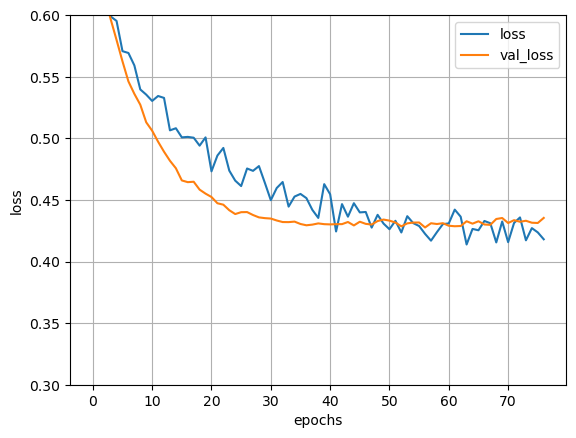

In [715]:
train_log = pd.DataFrame(history.history)
train_log[['loss', 'val_loss']].plot(
    xlabel='epochs',
    ylabel='loss',
    ylim=(0.3,0.6),
    grid=True
)

In [716]:
# 保存一下模型
# nn_clf.save('nn_model4.h5')

In [717]:
y_pred = nn_clf.predict(x_test)

6/6 [==============================] - 0s 2ms/step


In [718]:
proba_gamma = 0.5
accuracy_score(y_test, y_pred>proba_gamma)

0.770949720670391

In [719]:
roc_auc_score(y_test, y_pred>0.5)

0.7551265822784811

<AxesSubplot:ylabel='Proportion'>

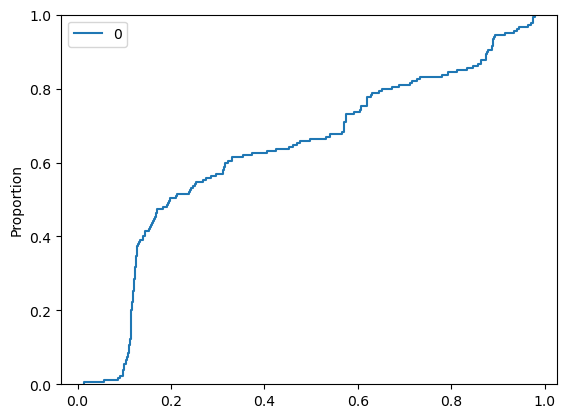

In [720]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.ecdfplot(y_pred)

In [311]:
result = nn_clf.predict(test).flatten()
result = np.where(result>proba_gamma, 1, 0)
result = pd.DataFrame(result, columns=['Survived'])
result['PassengerID'] = test_id
result.to_csv('result.csv', index=False)

14/14 [==============================] - 0s 2ms/step


# Ensemble

In [721]:
lgbm_pred = lgbm_clf.predict_proba(x_test)[:,1]
nn_pred = nn_clf.predict(x_test).flatten()

6/6 [==============================] - 0s 2ms/step


In [722]:
ensemble_pred = np.where((lgbm_pred + nn_pred) > 0.9, 1, 0)

In [723]:
accuracy_score(y_test, ensemble_pred)

0.8212290502793296

In [537]:
result = pd.DataFrame(ensemble_pred, columns=['Survived'])
result['PassengerID'] = test_id
result.to_csv('result.csv', index=False)

# OUTPUT

In [315]:
test_result = test.copy()
test_result['Survived'] = lgbm_clf.predict(test)
test_result = test_result[['PassengerId', 'Survived']]
test_result.to_csv('test_result.csv', index=False)